Making some illustrative plots of how the predicted stray light spectrum should change w pointing, for Rogier Windhorst.  jrigby, 5 Oct 2022

In [20]:
import jrr
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import pandas

In [11]:
plt.rcParams['figure.figsize'] = [12, 8]
matplotlib.rcParams.update({'font.size': 18})

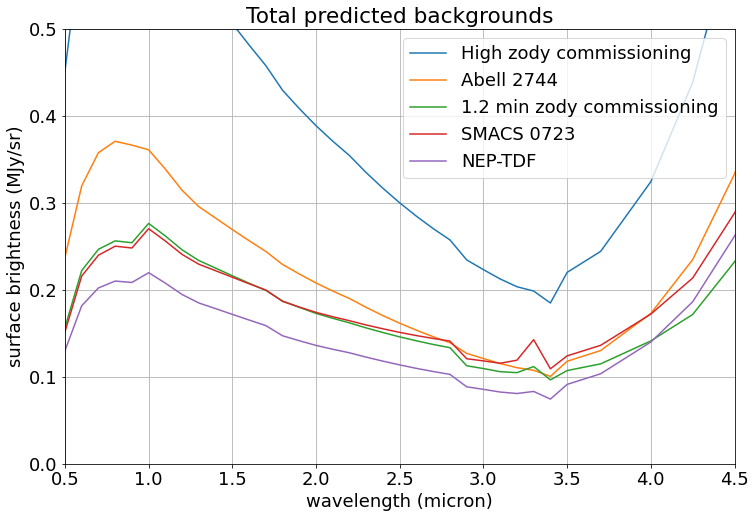

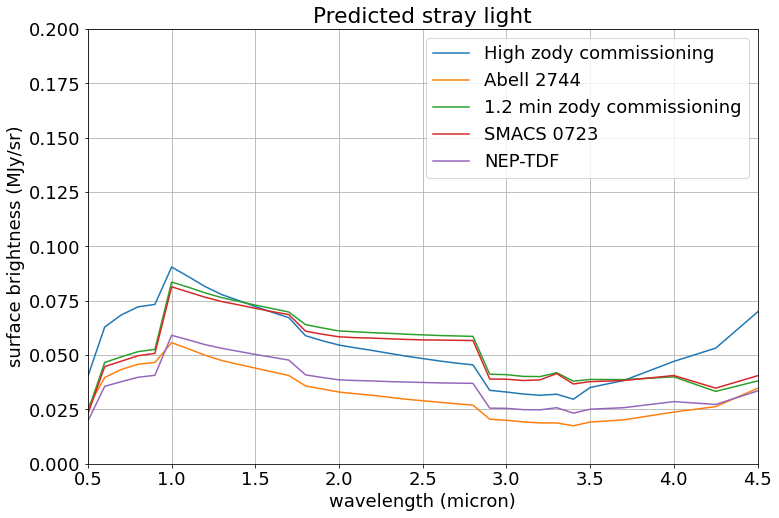

In [27]:
pp = PdfPages('predicted_backgrounds_compare.pdf')  # output
bkg_files = [ 'straylightcar_predictedbkg_visitjw01448007.txt', 'abell2744_predictedbkg_date2022-06-28.txt', 'straylightcar_predictedbkg_visitjw01448005.txt',\
             'smacs0723_predictedbkg_date2022-06-17.txt', 'NEP-TDF_predictedbkg_date2022-08-30.txt', ] 
titles = ['High zody commissioning', 'Abell 2744', '1.2 min zody commissioning', 'SMACS 0723', 'NEP-TDF']
# stray light car visit 7 is the high zody commissioning field
# stray light car visit 5 is the 1.2 min zody commissioning field

bkg_df = {}
for ii, bkg_file in enumerate(bkg_files):
    bkg_df[bkg_file] = jrr.jwst.open_background_file(bkg_file)
    df =     bkg_df[bkg_file]
    plt.plot(df.wave, df.total, label = titles[ii], lw=1.5)
plt.ylim(0.0, 0.5)
plt.xlim(0.5,4.5)
plt.grid(visible=True)
plt.xlabel("wavelength (micron)")
plt.ylabel("surface brightness (MJy/sr)")
plt.title("Total predicted backgrounds")
plt.legend()
pp.savefig()
plt.show()

for ii, bkg_file in enumerate(bkg_files):
    df =     bkg_df[bkg_file]
    plt.plot(df.wave, df.straylight, label = titles[ii], lw=1.5)
plt.ylim(0.0, 0.2)
plt.xlim(0.5,4.5)
plt.grid(visible=True)
plt.xlabel("wavelength (micron)")
plt.ylabel("surface brightness (MJy/sr)")
plt.title("Predicted stray light")
plt.legend()
pp.savefig()
plt.show()
pp.close()